# Offline Evaluation Metrics Visualizations
This notebook visualizes user-specific performance metrics of various recommenders in the mind-val dataset to assess effectiveness and ranking overlap. We explore two metric groups:
1. **Effectiveness Metrics**: We use ranking-based metrics, Normalized Discounted Cumulative Gain (NDCG) and Reciprocal Rank (RR), to evaluate recommender effectiveness.
2. **Ranking Overlap Metrics**: We use Rank-Based Overlap (RBO) to assess consistency in top-k recommendations relative to fianl rankings.

## 1. Setup

### 1. 1 Importing Libraries

PyData packages:

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Local code:

In [7]:
from IPython.display import HTML

from poprox_recommender.eval_tables import EvalTable

Set up progress:

In [8]:
from tqdm.autonotebook import tqdm as notebook_tqdm

### 1. 2 Loading Data

In [9]:
mind_val_user_metrics = pd.read_csv("../outputs/mind-val/profile-metrics.csv.gz")
mind_val_user_metrics.head()

,Unnamed: 0,profile_id,recommender,personalized,NDCG@5,NDCG@10,RR,RBO@5,RBO@10
0,0,00002229-1f34-5beb-ba44-89021dd1f157,nrms,True,0.0,0.30103,0.1,0.409510,0.651322
1,1,00002229-1f34-5beb-ba44-89021dd1f157,mmr,True,0.0,0.00000,0.0,0.216469,0.289265
2,2,00002229-1f34-5beb-ba44-89021dd1f157,pfar,True,0.0,0.30103,0.1,0.409510,0.651322
3,3,00002229-1f34-5beb-ba44-89021dd1f157,topic-cali,True,0.0,0.30103,0.1,0.409510,0.651322
4,4,00002229-1f34-5beb-ba44-89021dd1f157,locality-cali,True,0.0,0.30103,0.1,0.409510,0.651322


In [10]:
effectiveness_metrics = ["NDCG@5", "NDCG@10", "RR"]
overlap_metrices = ["RBO@5", "RBO@10"]

## 2. Results

### 2. 1 Effectiveness Metrics
NDCG measures how well the recommendations align with user test data, focusing on the top-k positions, such as the top 5 (NDCG@5) or top 10 (NDCG@10). Likewise, RR evaluates how well the recommender finds the most relevant item as the top result.

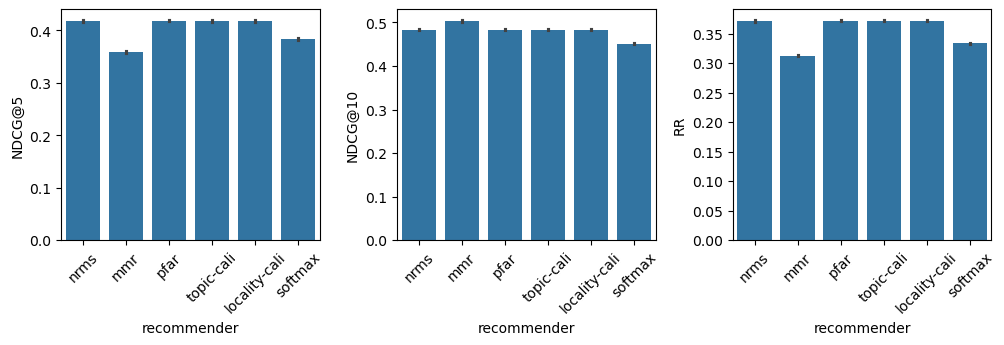

In [11]:
plt.figure(figsize=(12, 3))
plt.subplots_adjust(wspace=0.3)

for i, metric in enumerate(effectiveness_metrics, 1):
    plt.subplot(1, 3, i)
    sns.barplot(data=mind_val_user_metrics, x="recommender", y=metric)
    plt.xticks(rotation=45)

plt.show()

The summary tables show the mean values, standard deviation, and quantiles (10%ile, Median, 90%ile), each accompanied by their respective 95% confidence intervals for effectiveness metrics across recommenders.

In [12]:
for metric in effectiveness_metrics:
    tw = EvalTable(mind_val_user_metrics, "recommender", metric, progress=notebook_tqdm)
    tw.add_stat("Mean", np.mean, ci=True)
    tw.add_stat("Std Dev", np.std, ci=True)
    tw.add_quantiles(["10%ile", "Median", "90%ile"], [0.1, 0.5, 0.9], ci=True)
    display(HTML(f"<h3>Summary Table for {metric}</h3>"))
    display(HTML(tw.html_table()))

quantiles: 100%|███████████████████████████████████████████████████| 6/6 [11:18<00:00, 113.04s/it]


"locality-cali 0.418(0.417,0.419)","0.410(0.410,0.411)","0.000(0.000,0.000)","0.431(0.431,0.431)","1.000(1.000,1.000)",
"mmr 0.359(0.357,0.361)","0.537(0.534,0.539)","0.000(0.000,0.000)","0.000(0.000,0.000)","1.000(1.000,1.000)",
"nrms 0.418(0.416,0.419)","0.410(0.410,0.411)","0.000(0.000,0.000)","0.431(0.431,0.431)","1.000(1.000,1.000)",
"pfar 0.418(0.417,0.419)","0.410(0.410,0.411)","0.000(0.000,0.000)","0.431(0.431,0.431)","1.000(1.000,1.000)",
"softmax 0.383(0.382,0.385)","0.406(0.405,0.406)","0.000(0.000,0.000)","0.281(0.281,0.297)","1.000(1.000,1.000)",
"topic-cali 0.418(0.417,0.419)","0.410(0.410,0.411)","0.000(0.000,0.000)","0.431(0.431,0.431)","1.000(1.000,1.000)",


quantiles: 100%|███████████████████████████████████████████████████| 6/6 [11:29<00:00, 114.93s/it]


"locality-cali 0.483(0.482,0.484)","0.370(0.370,0.371)","0.000(0.000,0.000)","0.431(0.431,0.431)","1.000(1.000,1.000)",
"mmr 0.503(0.500,0.505)","0.784(0.779,0.788)","0.000(0.000,0.000)","0.333(0.333,0.333)","1.000(1.000,1.000)",
"nrms 0.483(0.482,0.484)","0.370(0.370,0.371)","0.000(0.000,0.000)","0.431(0.431,0.431)","1.000(1.000,1.000)",
"pfar 0.483(0.482,0.484)","0.370(0.370,0.371)","0.000(0.000,0.000)","0.431(0.431,0.431)","1.000(1.000,1.000)",
"softmax 0.451(0.450,0.452)","0.368(0.367,0.368)","0.000(0.000,0.000)","0.387(0.387,0.387)","1.000(1.000,1.000)",
"topic-cali 0.483(0.482,0.484)","0.370(0.370,0.371)","0.000(0.000,0.000)","0.431(0.431,0.431)","1.000(1.000,1.000)",


quantiles: 100%|███████████████████████████████████████████████████| 6/6 [11:30<00:00, 115.06s/it]


"locality-cali 0.372(0.370,0.373)","0.360(0.359,0.360)","0.000(0.000,0.000)","0.250(0.250,0.250)","1.000(1.000,1.000)",
"mmr 0.313(0.312,0.314)","0.380(0.379,0.381)","0.000(0.000,0.000)","0.143(0.143,0.143)","1.000(1.000,1.000)",
"nrms 0.371(0.370,0.373)","0.360(0.359,0.360)","0.000(0.000,0.000)","0.250(0.250,0.250)","1.000(1.000,1.000)",
"pfar 0.372(0.370,0.373)","0.360(0.359,0.360)","0.000(0.000,0.000)","0.250(0.250,0.250)","1.000(1.000,1.000)",
"softmax 0.333(0.332,0.335)","0.342(0.342,0.343)","0.000(0.000,0.000)","0.200(0.200,0.200)","1.000(1.000,1.000)",
"topic-cali 0.372(0.370,0.373)","0.360(0.359,0.360)","0.000(0.000,0.000)","0.250(0.250,0.250)","1.000(1.000,1.000)",


### 2. 2 Ranking Overlap Metrics
RBO measures the similarity between two ranked lists, evaluating how much overlap exists between recommendations and user preferred rankings. RBO can be applied at different list depths to analyze performance consistency, such as RBO@5 and RBO@10.

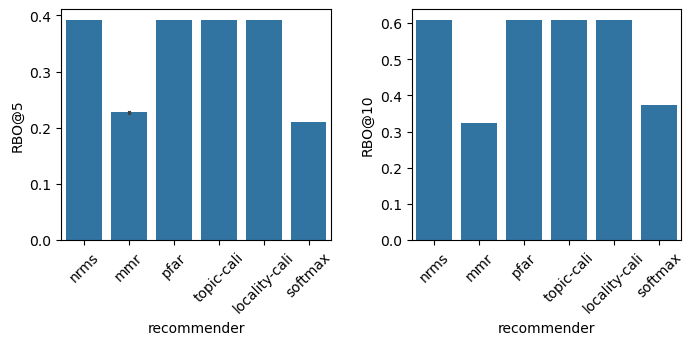

In [13]:
plt.figure(figsize=(8, 3))
plt.subplots_adjust(wspace=0.3)

for i, metric in enumerate(overlap_metrices, 1):
    plt.subplot(1, 2, i)
    sns.barplot(data=mind_val_user_metrics, x="recommender", y=metric)
    plt.xticks(rotation=45)

plt.show()

The summary tables show the mean values, standard deviation, and quantiles (10%ile, Median, 90%ile), each accompanied by their respective 95% confidence intervals for ranking overlap metrics across recommenders.

In [14]:
for metric in overlap_metrices:
    tw = EvalTable(mind_val_user_metrics, "recommender", metric, progress=notebook_tqdm)
    tw.add_stat("Mean", np.mean, ci=True)
    tw.add_stat("Std Dev", np.std, ci=True)
    tw.add_quantiles(["10%ile", "Median", "90%ile"], [0.1, 0.5, 0.9], ci=True)
    display(HTML(f"<h3>Summary Table for {metric}</h3>"))
    display(HTML(tw.html_table()))

quantiles: 100%|███████████████████████████████████████████████████| 6/6 [10:15<00:00, 102.61s/it]


"locality-cali 0.391(0.391,0.392)","0.072(0.072,0.073)","0.396(0.396,0.396)","0.410(0.410,0.410)","0.410(0.410,0.410)",
"mmr 0.227(0.227,0.227)","0.058(0.058,0.058)","0.203(0.203,0.203)","0.203(0.203,0.203)","0.307(0.307,0.307)",
"nrms 0.391(0.391,0.392)","0.072(0.072,0.073)","0.396(0.396,0.396)","0.410(0.410,0.410)","0.410(0.410,0.410)",
"pfar 0.391(0.391,0.391)","0.072(0.072,0.073)","0.396(0.396,0.396)","0.410(0.410,0.410)","0.410(0.410,0.410)",
"softmax 0.210(0.210,0.211)","0.111(0.111,0.112)","0.044(0.044,0.044)","0.216(0.216,0.219)","0.364(0.364,0.364)",
"topic-cali 0.391(0.391,0.392)","0.072(0.072,0.073)","0.396(0.396,0.396)","0.410(0.410,0.410)","0.410(0.410,0.410)",


quantiles: 100%|███████████████████████████████████████████████████| 6/6 [11:03<00:00, 110.60s/it]


"locality-cali 0.608(0.607,0.608)","0.126(0.125,0.127)","0.525(0.525,0.525)","0.651(0.651,0.651)","0.651(0.651,0.651)",
"mmr 0.323(0.323,0.324)","0.103(0.102,0.103)","0.235(0.235,0.235)","0.311(0.308,0.311)","0.453(0.453,0.453)",
"nrms 0.608(0.607,0.608)","0.126(0.125,0.127)","0.525(0.525,0.525)","0.651(0.651,0.651)","0.651(0.651,0.651)",
"pfar 0.608(0.607,0.608)","0.126(0.125,0.127)","0.525(0.525,0.525)","0.651(0.651,0.651)","0.651(0.651,0.651)",
"softmax 0.373(0.372,0.373)","0.146(0.146,0.146)","0.172(0.171,0.172)","0.382(0.381,0.383)","0.552(0.552,0.553)",
"topic-cali 0.608(0.607,0.608)","0.126(0.125,0.127)","0.525(0.525,0.525)","0.651(0.651,0.651)","0.651(0.651,0.651)",
